True


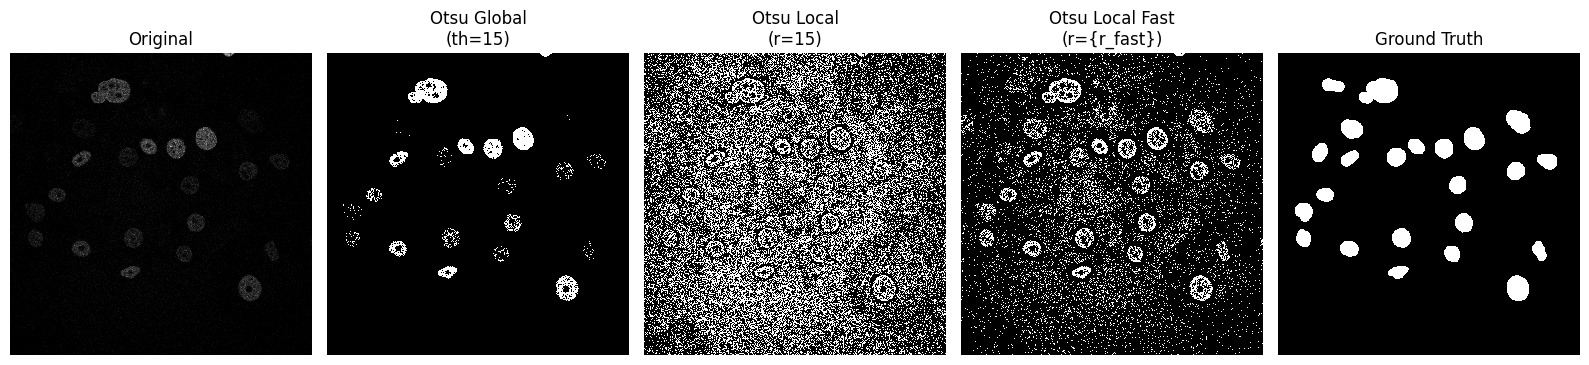

Dice Score (Global Otsu): 0.5705
Dice Score (Local Otsu) : 0.1775
Our Package Local Otsu: 0.3929


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_ubyte
from skimage.filters import threshold_otsu, threshold_local
from src.find_image import find_and_load_image
from src.Otsu_Local import local_otsu_package 

def dice_score(mask, gt):
    """Berechnet den Dice-Koeffizienten zweier Bool-Arrays."""
    inter = np.logical_and(mask, gt).sum()
    return 2 * inter / (mask.sum() + gt.sum())

# 2) Bilder laden als Graustufen
img = find_and_load_image("t01.tif", as_gray=True)
gt   = find_and_load_image("man_seg01.tif",   as_gray=True) > 0

# 3) In uint8 (0–255) umwandeln für Otsu
img_u8 = img_as_ubyte(img)

# 4) Global Otsu
t_global    = threshold_otsu(img_u8)
mask_global = img_u8 > t_global
gt_mask = gt > 0 

print(np.array_equal(gt, gt_mask))

# 5) Local Otsu (hier Fenster-Radius r = 15 px → block_size = 31)
r          = 15
block_size = 2 * r + 1
t_local    = threshold_local(img_u8, block_size, method="gaussian")
mask_local = img_u8 > t_local

# Local otsu package
r_fast = 15
t_map_fast = local_otsu_package(img_u8, r_fast)
mask_local_fast = img_u8 > t_map_fast


# 6) Plot: Original | Global Otsu | Local Otsu | Ground Truth
fig, axes = plt.subplots(1, 5, figsize=(16, 4))

axes[0].imshow(img,        cmap="gray", interpolation="none")
axes[0].set_title("Original")
axes[1].imshow(mask_global, cmap="gray", interpolation="none")
axes[1].set_title(f"Otsu Global\n(th={t_global:.0f})")
axes[2].imshow(mask_local,  cmap="gray", interpolation="none")
axes[2].set_title(f"Otsu Local\n(r={r})")
axes[3].imshow(mask_local_fast, cmap="gray", interpolation="none")
axes[3].set_title("Otsu Local Fast\n(r={r_fast})")
axes[4].imshow(gt,          cmap="gray", interpolation="none")
axes[4].set_title("Ground Truth")

for ax in axes:
    ax.axis("off")

plt.tight_layout()
plt.show()

# 6) Dice-Scores berechnen
dice_global = dice_score(mask_global, gt_mask)
dice_local  = dice_score(mask_local,  gt_mask)
dice_local_fast = dice_score(mask_local_fast, gt_mask)

# 8) Dice-Scores ausgeben
print(f"Dice Score (Global Otsu): {dice_global:.4f}")
print(f"Dice Score (Local Otsu) : {dice_local:.4f}")
print(f"Our Package Local Otsu: {dice_local_fast:.4f}")